<h1 style="text-align: center;">THE HEDGING AND DIVERSIFICATION ABILITIES OF BITCOIN AGAINST THE STOCK MARKET</h1>

---

### Introduction
This research investigates the hedging and diversification abilities of Bitcoin against the S&P500 and examines the leverage effect of Bitcoin return. This research uses symmetric GARCH model and asymmetric GARCH model like EGARCH and TGARCH (GJR) model. The results show that Bitcoin acts as a diversifier for investors in US market. In addition, the EGARCH and TGARCH models implied that there is leverage effect in Bitcoin return. Let's start our analysis.

### Objective
- **Find the relationship between Bitcoin and S&P 500.**
- Do descriptive statistics on time-series data.
- Conduct Stationary test and ARCH-effect test.
- Explore The GARCH models used in analyzing time-series data.
- Examines the leverage effect of Bitcoin return.

### Outline
1. [Conceptualization](#conceptualization)

2. [Data Review](#datareview)

3. [Hypothesis](#hypothesis)

4. [An Introduction to GARCH models](#introduction)
      
5. [Statistical test](#statisticaltest)
    
    - [Stationary test](#stationarytest)

    - [ARCH-effect test](#archeffecttest)

6. [Build model](#buildmodel)

7. [Conclusion](#conclusion)
---

<div id='conceptualization'/>

## 1. Conceptualization 
- **Bitcoin (BTC):** Bitcoin (BTC) is a cryptocurrency, a virtual currency designed to act as money and a form of payment outside the control of any one person, group, or entity, thus removing the need for third-party involvement in financial transactions.
- **Stock market:** Stocks, also known as equities, represent fractional ownership in a company, and the stock market is a place where investors can buy and sell ownership of such investable assets.
- **S&P 500 Index:** This Index is a market capitalization weighted index of 500 leading publicly traded companies in the U.S. These companies must meet specific criteria to be a part of the S&P 500.
- **Correlation:** Baur and Lucey (2010, pp. 5–6) were the first to define testable definitions of a diversifier and hedge, making it possible to explore and identify the capabilities of an asset. The definitions are as follows:
    - *A diversifier* is an asset that is positively (but not perfectly) correlated with another asset or portfolio on average.
    - *A strict hedge* is an asset that is negatively correlated with another asset or portfolio on average.
- **Leverage effect:** In econometrics, the leverage effect describes the negative relationship between asset value and volatility. A general explanation is "Negative news increases the volatility more than positive news of equal size" (Black, 1976; Christie, 1982).

---

<div id='datareview'/>

## 2. Data review

### About the dataset ([Data Source](https://www.kaggle.com/datasets/linhanphm/bitcoin-and-s-and-p-500-historical-prices))

The dataset includes historical daily prices of Bitcoin and the S&P 500 index from January 2011 to December 2022, enabling an in-depth analysis of their price movements and correlations.

**Variable:**
- *'Date':* This column represents the date associated with each observation.
- *'BtcPrice':*  Daily closing prices of Bitcoin (BTC).
- *'SpPrice'*: Daily closing prices of the S&P 500 Index.

**Now, let's do some descriptive analysis.**

In [1]:
# import libraries
library(fGarch)
library(PerformanceAnalytics)
library(rugarch)
library(tseries)
library(xts)
library(aTSA)
library(urca)
library(quantmod)
library(ggplot2)
library(dplyr)

NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify


Loading required package: TTR


Attaching package: ‘TTR’


The foll

In [2]:
# read the data
data <- read.csv("/kaggle/input/bitcoin-and-s-and-p-500-historical-prices/data.csv")

# view the first  6 rows of data
head(data)

,Date,BtcPrice,SpPrice
,<chr>,<dbl>,<dbl>
1,1/1/2011,0.3,1271.87
2,1/2/2011,0.3,1271.87
3,1/3/2011,0.3,1271.87
4,1/4/2011,0.3,1270.20
5,1/5/2011,0.3,1276.56
6,1/6/2011,0.3,1273.85


In [3]:
# check for null values
print(paste("NA values in df:", sum(is.na(data))))

[1] "NA values in df: 0"


**Null values:** There is no null values in the dataset.

In [4]:
# check the structure of all variables in the dataset
str(data)

'data.frame':	4383 obs. of  3 variables:
 $ Date    : chr  "1/1/2011" "1/2/2011" "1/3/2011" "1/4/2011" ...
 $ BtcPrice: num  0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 ...
 $ SpPrice : num  1272 1272 1272 1270 1277 ...


**'Date' variable:**

In time series analysis, it is common to have data that is indexed by time, such as daily, monthly, or yearly observations. By converting a column in our data to a sequence of dates, we are creating a time-based index for our data, which is essential for time series analysis.

For this reason, let's convert the 'Date' coulm to a sequence of dates with daily frequency.

In [5]:
# convert the 'Date' column to a sequence of dates with a frequency of one day
data$Date <- seq.Date(as.Date('2011-01-01'), as.Date('2022-12-31'), by = 'day')

**'BtcPrice and 'SpPrice' variable:**

AS you can see, the columns 'BtcPrice' and 'SpPrice' now are numerical values.

To work with time series data, we need to convert the two into a time series object. R provides the ts() function to create a time series object from a vector or a matrix.

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


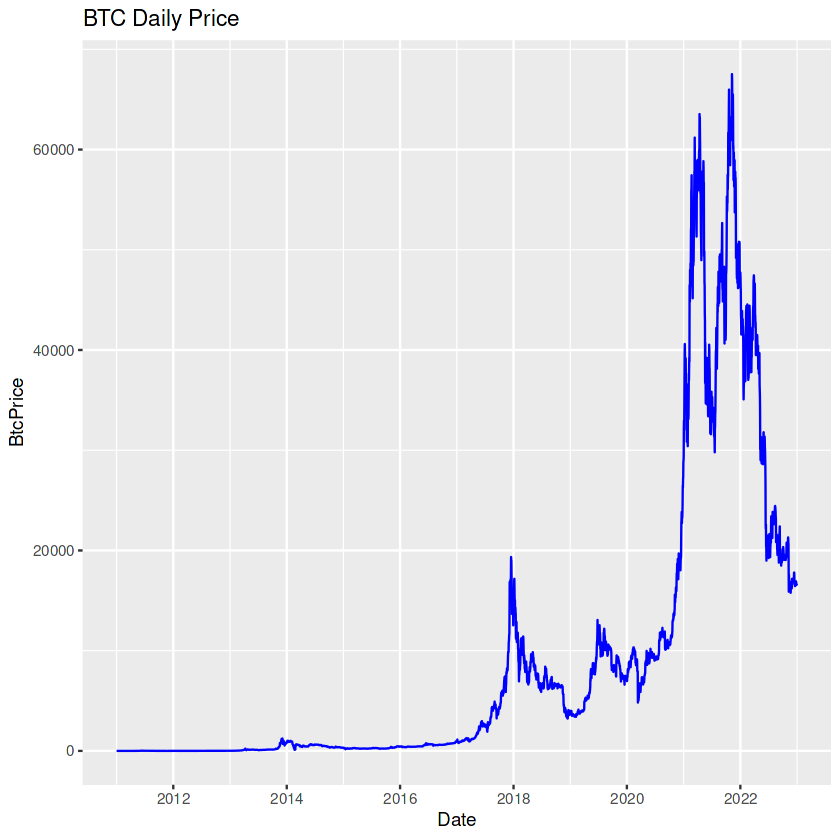

In [6]:
# BTC
# convert BTC Price to time series object
data$BtcPrice <- ts(data$BtcPrice)

# plot BTC Price overtime
ggplot(data, aes(y = BtcPrice, x = Date )) + geom_line(col = 'blue') + labs(title = 'BTC Daily Price', ylab = 'Price')

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


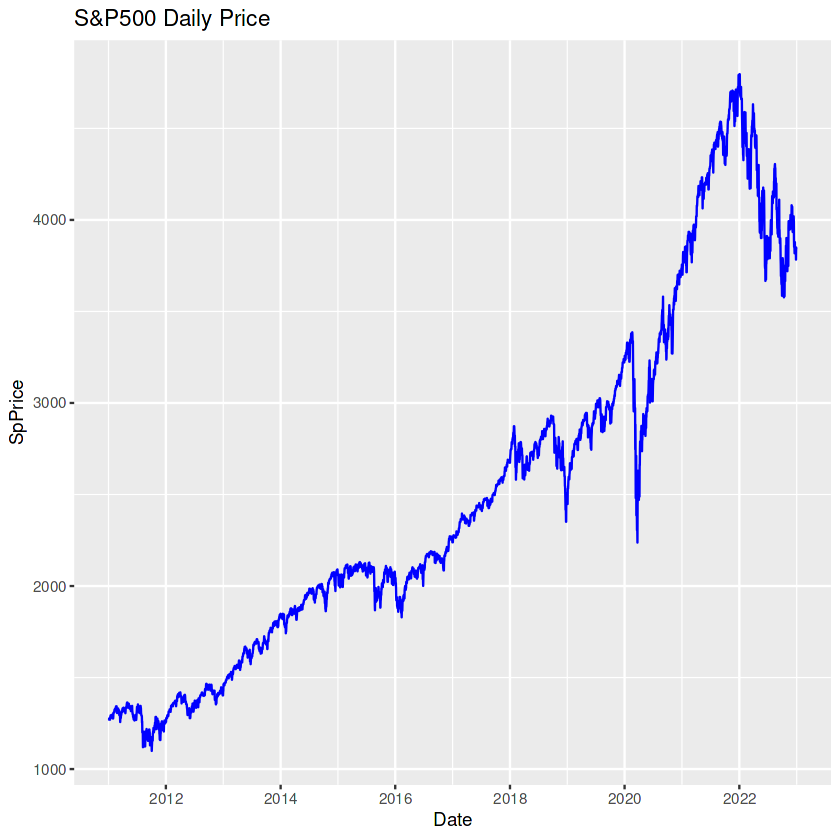

In [7]:
# S&P500 Index
# convert S&P500 Index to time series object
data$SpPrice <- ts(data$SpPrice)

# plot S&P500 Index Price overtime
ggplot(data, aes(y = SpPrice, x = Date )) + geom_line(col = 'blue') + labs(title = 'S&P500 Daily Price', ylab = 'Price')

**Calculate the return of bitcoin and S&P 500:**

I will use the *daily return* (not the Price) of the two assets as an input for my models.

So, from the daily prices of all the assets (Bitcoin and S&P500 Index), I calculated their daily returns and put them into the data frame for our analysis. The returns of the variables are calculated as a logarithmic rate: 

$$ Return = log({P_{t} \over P_{t-1}}) $$

where $P_{t}$ are the daily prices at market close of the variable in period t. 

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


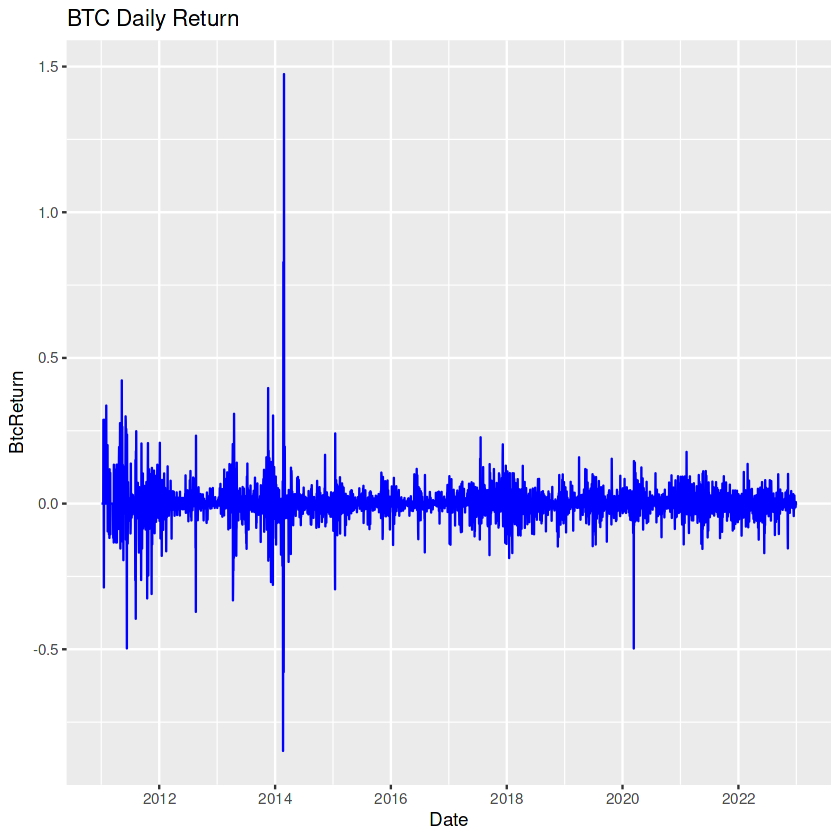

In [8]:
# calculate Daily Return of BTC 
data$BtcReturn <- CalculateReturns(data$BtcPrice, method="log")
# plot Daily Return of BTC overtime
ggplot(data, aes(y = BtcReturn, x = Date )) + geom_line(col = 'blue') + labs(title = 'BTC Daily Return', ylab = 'Return')

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


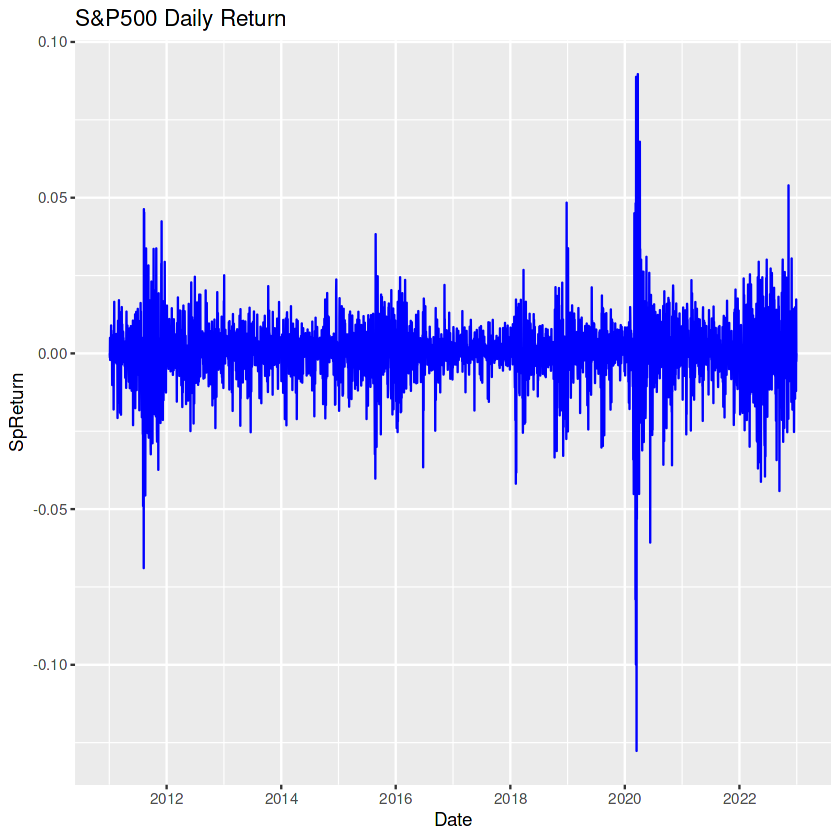

In [9]:
# calculate Daily Return of S&P500 
data$SpReturn <- CalculateReturns(data$SpPrice, method="log")
# plot Daily Return of S&P500  overtime
ggplot(data, aes(y = SpReturn, x = Date )) + geom_line(col = 'blue') + labs(title = 'S&P500 Daily Return', ylab = 'Return')

**Calculate the lag 1 S&P500 return**

The lag 1 of the return represents the return value that occurred one time period before the current observation. To calculate the lag 1, you take the return at time t-1, where t represents the current time period.

To build the model, I also need to use the lag 1 of 'SPReturn'. So now I will calculate it and put them into the dataset. 


In [10]:
# Delete the first row of the data because there are no results of the daily return in the first row
data <- data[-1,]

# Compute the lagged  value of S&P500 Return 
data$SpReturnLag <- lag(data$SpReturn, n=1)

**And here is our final dataset**

In [11]:
# Delete the first row of the data because the lagged return is null in the first row
data <- data[-1,]
head(data)

,Date,BtcPrice,SpPrice,BtcReturn,SpReturn,SpReturnLag
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2011-01-03,0.3,1271.87,0,0.000000000,0.000000000
4,2011-01-04,0.3,1270.20,0,-0.001313890,0.000000000
5,2011-01-05,0.3,1276.56,0,0.004994592,-0.001313890
6,2011-01-06,0.3,1273.85,0,-0.002125149,0.004994592
7,2011-01-07,0.3,1271.50,0,-0.001846505,-0.002125149
8,2011-01-08,0.3,1271.50,0,0.000000000,-0.001846505


---

<div id='hypothesis'/>

## 3. Hypothesis

The purpose of this project is to conduct an in-depth investigation into the correlation between Bitcoin (BTC) and the stock market. Therefore, the hypotheses is: **Bitcoin return is correlated with S&P 500 Index return.**

The outcomes of the developed models show an additional perspective on the degree of correlation of Bitcoin with the traditional benchmark of the financial market (S&P500 Index). If we can not reject our hypothesis, this means that there is significant correlation between Bitcoin and the stock markets. 
- If the correlation is positive, we can say that Bitcoin is a diversifier for stock.
- If the correlation is negative, we can say that Bitcoin is a hedging instrument for stock

---

<div id='introduction'/>

## 4. An Introduction to GARCH models

Three GARCH models are introduced to investigate the correlation of Bitcoin and stock market. GARCH model assumes that the errors exhibited conditional autoregressive heteroscedasticity. A test for ARCH effects in the residuals of the Bitcoin return is shown later in this project, the result shows that Bitcoin return has high ARCH effects which makes GARCH modelling is suitable. Additionally, an AR (1) process was identified for the return on Bitcoin which will be reflected in the mean equation similarly to the model by [Dyhrberg (2016)](https://www.sciencedirect.com/science/article/abs/pii/S1544612315001038?via%3Dihub).

### GARCH model

Theoretically, the GARCH model, or Generalized Autoregressive Conditionally Heteroscedastic model, was developed by doctoral student Tim Bollerslev in 1986. The goal of GARCH is to provide volatility measures for heteroscedastic time series data, much in the same way standard deviations are interpreted in simpler models.

GARCH (p, q) model (where p is the order of the ARCH terms $𝑢^2$ and q is the order of the GARCH terms $\sigma^2$) is a model which the error terms, can be split into a stochastic piece ($𝑧_{𝑡}$) and a time-dependent standard deviation ($\sigma_{t}$). The random variable $𝑧_{𝑡}$ is a strong white noise process while $\sigma_{𝑡}^2$ is an ARMA process:

$\sigma_{𝑡}^2 = \omega_{0} + \sum_{i = 1}^{p} \alpha_{i} u_{𝑡-i}^2 + \sum_{i = 1}^{q} \beta_{i} \sigma_{𝑡}^2$

In this project, a GARCH (1,1) with the mean equation (1) and variance equation (2) is estimated, as presented below:

**Mean Eq (1):** $BtcReturn_{t} = \beta_{0} + \beta_{1} BtcReturn_{t-1} + \beta_{2} SpReturn_{t} + \beta_{3} SpReturn_{t-1} + u_{t}$

**Variance Eq (2):** $\sigma_{𝑡}^2 = \omega_{0} + \alpha_{1} u_{𝑡-1}^2 + \beta_{1} \sigma_{𝑡-1}^2$

In the mean equation (1): 
- The coefficient $\beta_{0}$ show if the return on Bitcoin has an upward or downward drifting process.
- The coefficient $\beta_{2}$ is the one particularly of interest as its sign and significance show whether Bitcoin has hedging or diversified capabilities.

In the variance equation (2): 
-  $u_{𝑡-1}^2$ : ARCH (1) term
- $ \sigma_{𝑡-1}^2$: GARCH (1) term

As we know, GARCH model cannot account for leverage effect. Leverage effect is a tendency among time series for volatility to decline when return increase and rise when returns decrease. Bitcoin is a highly volatile asset, so we should add leverage effect to the model. Therefore, to make asymmetry crucial in modelling we can use asymmetric GARCH models like EGARCH and TGARCH to identify volatility correlations.


### EGARCH model (Exponential GARCH model)

Theoretically, the exponential general autoregressive conditional heteroskedastic (EGARCH) is another form of the GARCH model. E-GARCH model was proposed by Nelson (1991) to overcome the weakness in GARCH handling of financial time series. In particular, to allow for asymmetric effects between positive and negative asset returns. Formally, the variance equation of EGARCH model is defined as:

$log(\sigma_{𝑡}^2) = \omega_{0} + \alpha [\frac{|u_{t-1}|}{\sqrt{\sigma_{𝑡-1}^2}} - \sqrt\frac{2}{\pi}] + \beta_{0} log(\sigma_{𝑡-1}^2) + \gamma \frac{u_{t-1}}{\sqrt\sigma_{𝑡-1}^2}$

In EGARCH model:
- Variance is always positive because we only model the $log(\sigma_{𝑡}^2)$, so even if the parameters are negative, $\sigma_{𝑡}^2$ always be positive.
- Leverage effect implies that if the relationship between volatility and return is negative then: $\gamma < 0$

For our model, we have EGARCH (1,1) with the mean equation (3) and variance equation (4) as presented below:

**Mean Eq (3):** $BtcReturn_{t} = \beta_{0} + \beta_{1} BtcReturn_{t-1} + \beta_{2} SpReturn_{t} + \beta_{3} SpReturn_{t-1} + u_{t}$

**Variance Eq (4):** $log(\sigma_{𝑡}^2) = \omega_{0} + \alpha [\frac{|u_{t-1}|}{\sqrt{\sigma_{𝑡-1}^2}} - \sqrt\frac{2}{\pi}] + \beta_{0} log(\sigma_{𝑡-1}^2) + \gamma \frac{u_{t-1}}{\sqrt\sigma_{𝑡-1}^2}$

The mean equation (3) is the same as the mean equation (1) in GARCH model: 
- The coefficient $\beta_{2}$ is the one particularly of interest as its sign and significance show whether Bitcoin has hedging or diversified capabilities.

In the variance equation (2): 
-  $ [\frac{|u_{t-1}|}{\sqrt{\sigma_{𝑡-1}^2}} - \sqrt\frac{2}{\pi}]$ : EARCH (1) term
- $ log(\sigma_{𝑡-1}^2$: EGARCH (1) term
- $\gamma$: accounts for leverage effect. If $\gamma$ is significantly negative, there exists leverage effect in Bitcoin return.

In R, *rugarch package* specification for EGARCH model is slightly different from above equation. For leverage effect, we will see $\alpha < 0$. And the magnitude of leverage effect is $\gamma$ and $\gamma > 0$.


### TGARCH model (Threshold GARCH model)

Another popular asymmetric GARCH model is TGARCH or GJR model. Theoretically, TGARCH model involves a threshold component defined by regimes and one defined by the variance modelled conditionally in time. The TGARCH or GJR model is proposed by Glosten, Jagannathan and Runkle (1993). The GJR model is a simple extension of GARCH with an additional term added to account for possible asymmetries. The conditional variance is given by:

$\sigma_{𝑡}^2 = \omega_{0} + \alpha u_{t-1}^2 + \beta \sigma_{t-1}^2 + \gamma u_{t-1}^2 I_{t-1}$

In TGARCH model: 
- The condition for nonnegativity will be $\omega_{0} > 0$, $\alpha > 0$, $\beta \ge 0$, and $\alpha + \gamma \ge 0$
- For a leverage effect, we would see $\gamma > 0$
- $I_{t-1}$ is a dummy variable:
    - $I_{t-1} = 1$ when the market is downtrend ($u_{t-1} < 0$)
    - $I_{t-1} = 0$ when the market is uptrend ($u_{t-1} \ge 0$)

For our model have TGARCH (1,1) with the mean equation (5) and variance equation (6) as presented below:

**Mean Eq (5):** $BtcReturn_{t} = \beta_{0} + \beta_{1} BtcReturn_{t-1} + \beta_{2} SpReturn_{t} + \beta_{3} SpReturn_{t-1} + u_{t}$

**Variance Eq (6):** $\sigma_{𝑡}^2 = \omega_{0} + \alpha u_{t-1}^2 + \beta \sigma_{t-1}^2 + \gamma u_{t-1}^2 I_{t-1}$

The mean equation (5) is the same as the mean equation (1) and (3):
- The coefficient $\beta_{2}$ is the one particularly of interest as its sign and significance show whether Bitcoin has hedging or diversified capabilities.

In the variance equation (6):
-  $u_{𝑡-1}^2$ : ARCH (1) term
- $ \sigma_{𝑡-1}^2$: GARCH (1) term
- $\gamma$: : accounts for leverage effect
    - If $\gamma > 0$ and is significant, there exists leverage effect in Bitcoin return. When the market is uptrend ($I_{t-1} = 0$), the effect of $u_{𝑡-1}^2$ on $\sigma_{𝑡}^2$ is $\alpha$. When the market is downtrend ($I_{t-1} = 1$), the effect of $u_{𝑡-1}^2$ on $\sigma_{𝑡}^2$ is $\alpha + \gamma$.
    - We see that a shock of the same magnitude but of opposite sign implies that the fitted conditional variance for time t is larger when that is a negative shock.
    - If $\gamma = 0$, TGARCH model will become GARCH model, there are no leverage effect in our data.

**Now that we have covered the theoretical aspects of the GARCH model, it's time to put our knowledge into practice and build the GARCH models in R.**

---

<div id='statisticaltest'/>

## 5. Statistical test

<div id='stationarytest'/>

### Stationary Test

The data which are not stationary in the modelling will draw a misleading conclusion. The stationarity test is conducted to ensure that the data have been stationary. One of the ways to test the stationarity is conducted by Augmented Dickey Fuller test (ADF Test).

ADF test aims to find out whether the return data still contains the unit root or not. If the return data do not contain the unit root, it means that the data have been stationary. The hypothesis of ADF test is:
- H1: The data is non-stationary
- H2: The data is stationary


In [12]:
# adf test for btc return
tseries::adf.test(data$BtcReturn)

# adf test for S&P 500 return
tseries::adf.test(data$SpReturn)

Warning message in tseries::adf.test(data$BtcReturn):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$BtcReturn
Dickey-Fuller = -14.583, Lag order = 16, p-value = 0.01
alternative hypothesis: stationary


Warning message in tseries::adf.test(data$SpReturn):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$SpReturn
Dickey-Fuller = -16.045, Lag order = 16, p-value = 0.01
alternative hypothesis: stationary


The p-value of both BTC return and S&P 500 return are less than the significance level of 0.05 and hence we can reject the null hypothesis and take that all the series are stationary. Therefore, the prediction of the GARCH models can be conducted.

<div id='archeffecttest'/>

### ARCH effect Test

The ARCH effect test aims to discover whether the variance from the return data is constant or time varying. A time series exhibiting conditional heteroscedasticity is said to have autoregressive conditional heteroscedastic (ARCH) effects. Engle’s ARCH test is a Lagrange multiplier test to assess the significance of ARCH effects. The hypothesis of ARCH-LM Test test is: 
- H0: volatility homoscedastic
- H1: volatility heteroscedastic

We will conduct this test on BTC return. If the p-value is smaller than 0.05, we can reject the null hypothesis. This can conclude that the return of bitcoin are heteroscedasticity. If the volatility is heteroscedastic, it is reasonable to calculate the volatility value by using ARCH/GARCH method.

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order  PQ p.value
[1,]     4 633       0
[2,]     8 937       0
[3,]    12 942       0
[4,]    16 943       0
[5,]    20 944       0
[6,]    24 944       0
Lagrange-Multiplier test: 
     order    LM p.value
[1,]     4 14973       0
[2,]     8  3113       0
[3,]    12  1737       0
[4,]    16  1267       0
[5,]    20  1009       0
[6,]    24   837       0


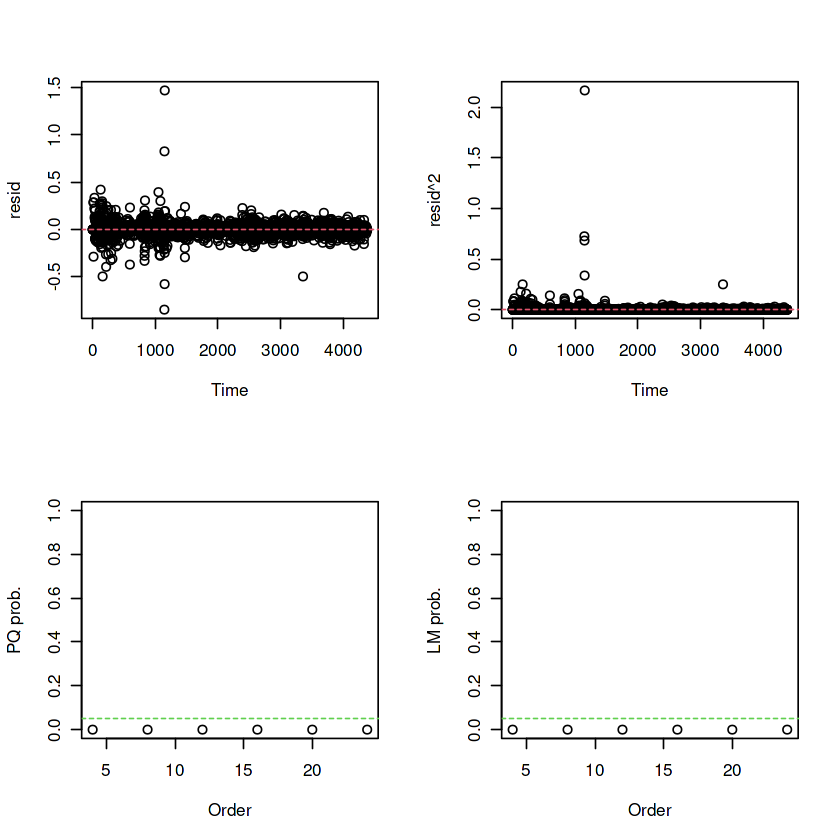

In [13]:
# test for arch effect in btc return
arch.test(arima(data$BtcReturn, order = c(0,0,0)))

it is seen that the p-values are 0.000000 (p-value < 0.05). We can conclude that the data are heteroscedastic and they contain the ARCH effect at the estimated model. Therefore, it is reasonable for us to use the GARCH models.

---

<div id='buildmodel'/>

## 6. Build model 

After applying the ADF unit root test and the ARCH-LM test to all the variables, I will perform GARCH, EGARCH and TGARCH to model Bitcoin’s return and volatility. From the results, we will determine how Bitcoin correlates with the stock market in the US. We can know whether Bitcoin has hedging or diversified capabilities or not correlate with the stock market. These GARCH models from the research will investigate if Bitcoin has any possibilities in risk management and portfolio analysis and will give further detail to the capabilities of Bitcoin in the financial marketplace.

### GARCH model

We first employ the GARCH model to investigate the relationship between Bitcoin returns and the return of S&P 500.

In [14]:
# GARCH model
s1 <- ugarchspec(variance.model = list(garchOrder = c(1,1)),
                mean.model = list(armaOrder = c(1,0), external.regressors = cbind(matrix(data$SpReturn), matrix(data$SpReturnLag))), 
                distribution.model="norm")

#fit model
garch.Sp500 <- ugarchfit(data = data$BtcReturn, spec = s1)

garch.Sp500


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001643    0.000506  3.24385 0.001179
ar1    -0.002929    0.018069 -0.16210 0.871228
mxreg1  0.750098    0.055498 13.51577 0.000000
mxreg2 -0.029968    0.062215 -0.48169 0.630025
omega   0.000062    0.000008  8.14443 0.000000
alpha1  0.160165    0.011198 14.30293 0.000000
beta1   0.829882    0.010335 80.29969 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001643    0.000565  2.90525 0.003670
ar1    -0.002929    0.019190 -0.15263 0.878687
mxreg1  0.750098    0.157969  4.74840 0.000002
mxreg2 -0.029968    0.080473 -0.37240 0.709595
omega   0.000062    0.000023  2.69950 0.006944
alpha1  

The coefficient $\beta_{2}$ of the mean Equation is the one particularly of interest as its sign and significance show whether Bitcoin has hedging or diversified capabilities. We see that coefficient $\beta_{2}$ *('mxreg1'coefficient)* is significantly positive at the level of significance of 0.05. The coefficients suggest that:  **"With 1 percent daily return movement in S&P500 Index, Bitcoin return move in the same direction by 0.75 percent."**

In the variance equation, we see that the ARCH and GARCH terms of the GARCH egressions are all significant.


With the results of GARCH model, we can say that the daily return of Bitcoin is correlated with US stock market. The correlation is positive so investors can use Bitcoin as an instrument to diversify their portfolio. **To conclude, with the GARCH model, we accept Hypothesis: Bitcoin return is correlated with S&P 500 Index return**

###  EGARCH model

To allow for asymmetry in Bitcoin return, we also consider the EGARCH and TGARCH model. In this section I will employ the EGARCH model given by adding an additional term to account for asymmetry in Bitcoin return.

In [15]:
# eGARCH models
s3 <- ugarchspec(variance.model = list(model = "eGARCH", garchOrder = c(1,1)),
                mean.model = list(armaOrder = c(1,0), external.regressors = cbind(matrix(data$SpReturn), matrix(data$SpReturnLag))), 
                distribution.model="norm")

#fit model
egarch.Sp500 <- ugarchfit(data = data$BtcReturn, spec = s3)

egarch.Sp500


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.002417    0.000633   3.81804 0.000135
ar1    -0.026852    0.016656  -1.61216 0.106927
mxreg1  0.760573    0.048966  15.53278 0.000000
mxreg2 -0.031103    0.059087  -0.52639 0.598614
omega  -0.208717    0.020843 -10.01370 0.000000
alpha1 -0.017491    0.008007  -2.18445 0.028929
beta1   0.961419    0.003358 286.29243 0.000000
gamma1  0.286104    0.014387  19.88649 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.002417    0.001517   1.59329 0.111096
ar1    -0.026852    0.023800  -1.12824 0.259219
mxreg1  0.760573    0.112716   6.74769 0.000000
mxreg2 -0.031103    0.110241  -0.28214 0.7

Like before, the sign and significance of coefficients $\beta_{2}$ *('mxreg1')* show the relationship of Bitcoin daily return with stock indexes.  In EGARCH model, we observe that $\beta_{2}$ for S&P 500 Index is positive and significant, indicating that the daily Bitcoin return is correlated with the S&P500 Index. So, investor can use Bitcoin as diversification tool for S&P500. The 
coefficient suggests that: **"With 1 percent daily return movement in S&P500 Index, Bitcoin return move in the same direction by 0.76 percent.** The effect of 𝛽2 in EGARCH model is similar to the GARCH model

In the variance equation, we see that the ARCH and GARCH terms of the regressions are all significant. As discussed above about the leverage effect, in rugarch package if $\alpha < 0$ , leverage effect is present. The magnitude of leverage effect is 𝛾. The coefficients 𝛼 *('alpha1')* in variance equation is negative and significant shows that there is an asymmetric impact on the volatility of the Bitcoin returns.

**To conclude, with the EGARCH model, we accept the Hypothesis: Bitcoin return is correlated with S&P 500 Index return.**

### TGARCH model

Another asymmetric GARCH model is TGARCH or GJR-GARCH. Like EGARCH, in TGARCH we also add an additional term to account for asymmetry in Bitcoin return.

In [16]:
# gjrGARCH models
s5 <- ugarchspec(variance.model = list(model = "gjrGARCH", garchOrder = c(1,1)),
                mean.model = list(armaOrder = c(1,0), external.regressors = cbind(matrix(data$SpReturn), matrix(data$SpReturnLag))), 
                distribution.model="norm")

#fit model
tgarch.Sp500 <- ugarchfit(data = data$BtcReturn, spec = s5)

tgarch.Sp500


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001367    0.000522  2.618417 0.008834
ar1     0.000561    0.018218  0.030787 0.975440
mxreg1  0.740724    0.056072 13.210140 0.000000
mxreg2 -0.027030    0.062218 -0.434444 0.663966
omega   0.000063    0.000008  8.227124 0.000000
alpha1  0.143448    0.012219 11.739849 0.000000
beta1   0.828860    0.010294 80.516064 0.000000
gamma1  0.034458    0.015089  2.283635 0.022393

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001367    0.000597  2.290893 0.021970
ar1     0.000561    0.019372  0.028953 0.976902
mxreg1  0.740724    0.154283  4.801086 0.000002
mxreg2 -0.027030    0.081313 -0.332424 0

The result is similar to the ones in GARCH and EGARCH, the sign and significance of coefficients $\beta_{2}$ is positive and significant. This means that the daily Bitcoin return is correlated with the S&P500. So, investors can use Bitcoin as a diversification tool for US stock market. The coefficient $\beta_{2}$ suggests that: **"With 1 percent daily return movement in S&P500 Index, Bitcoin returns move in the same direction by 0.74 percent.** The effect of 𝛽2 in TGARCH model is similar to the GARCH and EGARCH model.

In the variance equation, we see that the ARCH and GARCH terms of the regressions are all significant. In TGARCH model, if $\gamma > 0$, there is leverage effect. We see that the coefficient $\gamma$ is positive and significant show that there is an asymmetric impact on the volatility of the Bitcoin returns.

**To conclude, with the TGARCH model, we accept the Hypothesis: Bitcoin return is correlated with S&P 500 Index return.**

### News impact curve

News impact curve is introduced by Pagan and Schwert (1990). News impact curve is a plot which represents the degree of asymmetry of volatility to positive and negative shocks. The news impact curve plots the volatility (conditional variance, $\sigma_{t}^2$) that would arise from various positive and negative values of the lagged shock ($u_{t-1}$), given an estimated model. In short, the news impact curve captures the asymmetric impact of negative news on volatility.

Use the estimated models above to plot the news impact curve. We want to see how Bitcoin reacts to good and bad news. The more asymmetric in the plot, the more Bitcoin is sensitive to the news.

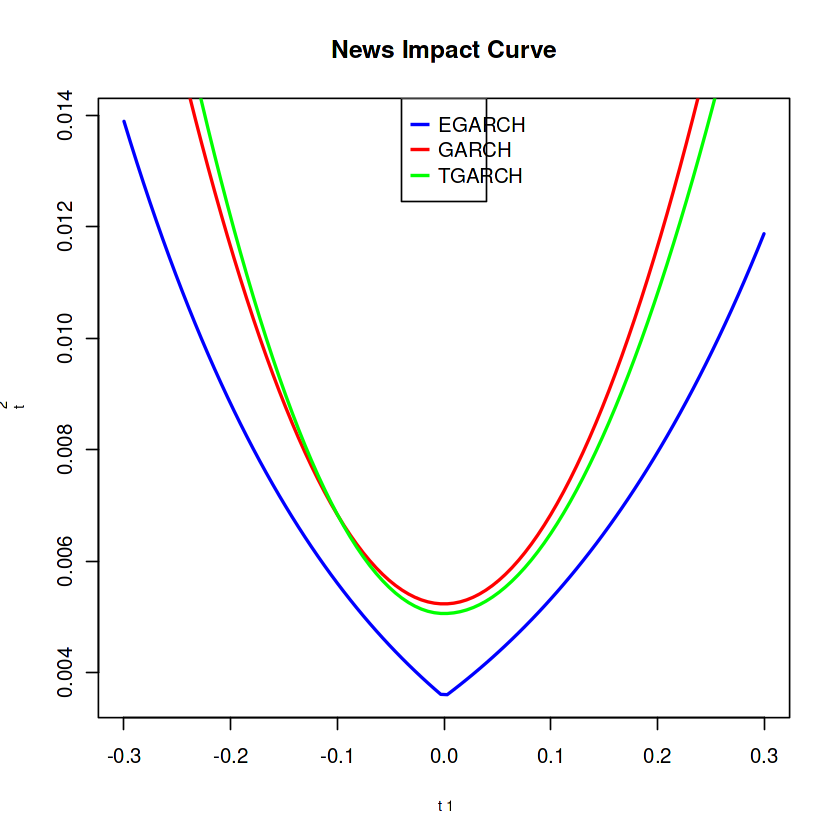

In [17]:
# News impact curve
ni.garch.Sp500 <- newsimpact(garch.Sp500)
ni.egarch.Sp500 <- newsimpact(egarch.Sp500)
ni.tgarch.Sp500 <- newsimpact(tgarch.Sp500)
plot(ni.egarch.Sp500$zx, ni.egarch.Sp500$zy, type = "l", lwd = 2, col="blue", main = "News Impact Curve", 
         ylab = ni.egarch.Sp500$yexpr, xlab = ni.egarch.Sp500$xexpr)
lines(ni.garch.Sp500$zx, ni.garch.Sp500$zy, lwd = 2, col = "red")
lines(ni.tgarch.Sp500$zx, ni.tgarch.Sp500$zy, lwd = 2, col = "green")
legend(x="top", legend = c("EGARCH", "GARCH", "TGARCH"), col = c("blue", "red", "green"), lty = 1, lwd = 2, cex = 1)

As we see, the GARCH news impact curve (the red line) is symmetric because the GARCH model does not account for leverage effect. 

On the other hand, the news impact curves of EGARCH and TGARCH model (the blue line and the green line) is asymmetric. But the level of asymmetry in two models are not too high. So the volatility of Bitcoin is not too much difference in the uptrend market vs the downtrend market.

---

<div id='conclusion'/>

## 7. Conclusion 

In conclusion, this study aimed to explore the correlation between Bitcoin and the S&P 500 index. Through our analysis, we found that there is a significantly positive correlation between these two financial assets. I use three different time series GARCH family models, GARCH, EGARCH and TGARCH. All three models provide evidence that Bitcoin can be used as a diversification for the S&P 500. These findings suggest that holding Bitcoin could provide diversification benefits for investors. This information can be valuable for investors seeking to diversify their portfolios and manage risks effectively.

Moreover, EGARCH and TGARCH show that there is a significantly asymmetric impact on the volatility of the Bitcoin returns.

However, it is essential to note that correlation does not imply causation. While our study reveals a correlation between Bitcoin and the S&P 500, further research is needed to understand the underlying factors driving this relationship. Factors such as market sentiment, investor behavior, and macroeconomic indicators may play a role in shaping the correlation dynamics.

Overall, this study provides valuable insights into the correlation of Bitcoin and the S&P 500, shedding light on the interconnectedness of digital currencies and traditional financial markets. As the cryptocurrency market continues to evolve, understanding these relationships becomes increasingly important for market participants and researchers alike.